#### 1. Description of the Problem and Discussion of the Background

#### Induction Section -- Week 1

Prospects of a Lunch Restaurant, close to office area (CBD) in Tokyo, Japan.

Tokyo is a bustling city in the world. One of the top ranking global economic cities in the world, which is why is definitely one of the best places to start up a new business. 

During the daytime, especially in the morning and lunch hours, office areas provide huge opportunities for restaurants. Reasonably priced (usually around $8-$10 USD) shops are filled with hungry customers during lunch hours (1100-1400). Given this scenario, we will go through the benefits and pitfalls of opening breakfast/lunch restaurants in highly densed office places. The profit margin for a decent restaurant lay between 15-20%, or go as high as 35%.

We will go through each step of this project and address them accordingly. For this week, I wil describe the initial data preparation and future steps to start wrangling the neigherhoods data in Tokyo. 

1. <font color=orange> Obtain the Data </font>
    * Name of the 23 Wards area and population from webscrapping
    * Obtain information about best business districts
    * Use Foursquare location data as restaurant info

2. <font color=orange> Data Visualization and Statistical Analysis </font>

3. <font color=orange> Analysis Using Clustering, K-Means Clustering </font>
     * maximize the number of clusters
     * visualization using cloropleth map
 
4. <font color=orange> Compare the Neighborhoods to Find the Best Place for Starting up a Restaurant </font>

5. <font color=orange> Inference from these Results and Related Conclusion </font>

#### <font color=blue> Target Audience </font>

1. Business personnel who wants to invest or open a restaurant. this analysis will be a comprehensive guide to start or expand restaurants targeting the large pool of office workers in Tokyo during lunch hours. 

2. Freelancer who looking for catering side business. This analysis will give them some fundamentl insights pertaining the costing background of the business idea. 

3. People who are looking for budget meal

4. Budding data scientists, who wants to implement some of the most used exploratory data analysis techniques to obtain necessary data, analyze it andm finally be able to tell a story out of it. 

#### 2. Initial Data Preparation (Week 1)

2.1 Get the name of the wards, major districts and population from Wikipedia

2.2 Processing the information from Wiki to make necessary lists

2.3 Get the coordinates of the major districts

2.4 Check and Compare with Google search and refine if necessary 

### 3. Exploratory Data Analysis (Week 2)

In [32]:
# import the necessary Libraries 
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [69]:
from geopy.geocoders import Nominatim

### First, get the name of the wards, major districts and population from Wikipedia

In [72]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
soup = BeautifulSoup(response_obj,'lxml')
Wards_Tokyo_Table = soup.find('table', {'class':'wikitable sortable'})
### preparation of the table 

Name=[]
Kanji = []
Pop = []
Density = []
num = []
flag = []
Area = []
Major_District = []

for row in Wards_Tokyo_Table.findAll("tr"):
    #print (row)    
    Ward = row.findAll('td')
    #print (len(Ward))
    print (Ward)
    if len(Ward)==8: #Only extract table body not heading
        print (Ward[0])
        #print postcode[1]
        #print postcode[2]
        num.append(Ward[0].find(text=True))
        flag.append(Ward[1].findAll('a')) # useless
        Name.append(Ward[2])
        Kanji.append(Ward[3].find(text=True))
        Pop.append(Ward[4])
        Area.append(Ward[5].find(text=True))
        Major_District.append(Ward[7].find(text=True))

        
#print (Pop) 


#++++++++++++++++++++++++++++++++++++++++++++++
#+ Area 
#++++++++++++++++++++++++++++++++++++++++++++++

# print (Area[3]) # the first element of the area needs a replacement with the true value 5100
Area = ['5100' if x=='0' else x for x in Area]
New_Area = []

# change the type of Area list 
for l in range(len(Area)):
    x=Area[l].replace(",","")
    print (x)
    New_Area.append(x)

New_Area=[int(s) for s in New_Area]

#print (New_Area) # the list elements are already in accordance with the table

#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ Name of the Wards
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#print (Name) # want to select only the title part

new_names = []
for n in range(len(Name)):
    print (Name[n])
    names = Name[n].findAll('a')
    new_names.append(names) 

print (new_names)

flat_new_names_list = [item for sublist in new_names for item in sublist]
print (flat_new_names_list)

Wards_names= []
#now 
for name_wards in flat_new_names_list:
        Wards_names.append(name_wards.get('title'))

print (Wards_names)

# replace the elements in the list that contains 'Tokyo' with only the ward names
replace_names={'Chiyoda, Tokyo':'Chiyoda', 'Chūō, Tokyo':'Chuo', 'Minato, Tokyo':'Minato', 
               'Sumida, Tokyo':'Sumida', 'Koto, Tokyo':'Koto', 'Ōta, Tokyo':'Ota', 'Nakano, Tokyo':'Nakano', 
               'Kita, Tokyo':'Kita', 'Arakawa, Tokyo':'Arakawa', 'Adachi, Tokyo':'Adachi', 'Edogawa, Tokyo':'Edogawa'}


Wards_names1 = [replace_names.get(n1,n1) for n1 in Wards_names]

#print (Wards_names1)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ Population
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
# print (len(Pop))
# #print ((Pop[5].text))
population = []
for p in range(len(Pop)):
    print ((Pop[p]))
    pops = Pop[p].text[1:9]
    print (Pop[p].text[1:9])
    #populs = Pop[p].find('visibility:hidden;color:transparent;')
    population.append(pops) 
print (population)

New_population = []
for po in range(len(population)):
    xy=population[po].replace(",","")
    print (xy)
    New_population.append(xy)

New_population=[int(s1) for s1 in New_population]
# print (New_population)



#++++++++++++++++++++++++++++++++++++++++++++++++
#+ Major Districts
#++++++++++++++++++++++++++++++++++++++++++++++++


replace_districts = {'Nagatachō':'Nagatacho', 'Hongō':'Hongo', 'Kinshichō':'Kinshicho', 'Ōmori': 'Omori', 
                     'Kōenji':'Koenji', 'Arakawa, Machiya, ':'Arakawa', 'Ayase, ':'Ayase', 'Kasai, Koiwa\n':'Kasai'}


Major_District_names1 = [replace_districts.get(n2,n2) for n2 in Major_District]


df=pd.DataFrame(Wards_names1,columns=['Ward'])
df['Area_SqKm'] = New_Area
df['Population'] = New_population
df['Major_District'] = Major_District_names1
df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 

# use of geopy geocoders
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tokyo_explorer")
df['Major_Dist_Coord']= df['Major_District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
# replace some of the wrong coordinates 


Lat_list = df['Latitude'].tolist()
Long_list = df['Longitude'].tolist()
print ("Old latitude list: ", Lat_list)
print ("Old Longitude list: ", Long_list)
replace_latitudes = {32.5093796:35.7088, 23.0131338:35.6722, -38.9047057:35.5884, -5.3498001:35.6634}
replace_longitudes = {-116.2970014:139.7601, -80.8328748:139.8061, 175.7552111:139.7279, 21.424098:139.8731}

latitudes_new = [replace_latitudes.get(n3,n3) for n3 in Lat_list]
longtitudes_new = [replace_longitudes.get(n4,n4) for n4 in Long_list]
print (latitudes_new)
print (longtitudes_new)

Tokyo_df = df.drop(['Latitude', 'Longitude'], axis=1)
# #df.drop(['Longitude'], axis=1, inplace=True)
# Tokyo_df


Tokyo_df['Dist_Latitude'] = latitudes_new
Tokyo_df['Dist_Longitude'] = longtitudes_new

#Tokyo_df

#Tokyo_df.to_csv('Tokyo_df_Coord.csv')


[]
[<td>01</td>, <td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/75px-Flag_of_Chiyoda%2C_Tokyo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/100px-Flag_of_Chiyoda%2C_Tokyo.svg.png 2x" width="50"/></a></td>, <td><a href="/wiki/Chiyoda,_Tokyo" title="Chiyoda, Tokyo">Chiyoda</a></td>, <td>千代田区
</td>, <td><span style="visibility:hidden;color:transparent;">0</span><span style="visibility:hidden;color:transparent;">0</span>59,441</td>, <td><span style="visibility:hidden;color:transparent;">0</span>5,100</td>, <td><span style="visibility:hidden;color:transparent;">0</span>11.66
</td>, <t

GeocoderTimedOut: Service timed out

### Starting of Week 2

In [76]:
Tokyo_df.to_csv('Tokyo_df_Coord.csv')

In [77]:
Tokyo_df = pd.read_csv('Tokyo_df_Coord.csv', index_col=[0])
#remove the unnamed column 
Tokyo_df.head(3)

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
3,Minato,12180,248071,Odaiba,35.626722,139.772101


Here we want to concentrate on the the best 5 wards:
1. Chiyoda--Nagatacho
2. Shinjuku--Shinjuku
3. Shibuya--Shibuya
4. Chuo--Nihombashi
5. Shinagawa--Shinagawa

So as the next step, we will use Foursquare data and obtain information on restaurants. With these, we can start with out battle of neighborhoods for opending a restaurant in Tokyo. 

### Get the average land price in different areas of Tokyo form webscrapping

In [78]:
response_obj = requests.get('https://utinokati.com/en/details/land-market-value/area/Tokyo/').text
#print (type (response_obj))
soup = BeautifulSoup(response_obj,'lxml')
#print (soup.prettify())

In [79]:
Price_Tokyo_Table = soup.find('table', {'class':'table-condensed'})
#Price_Tokyo_Table

In [85]:
Name=[]
Avg_price = []


for row in Price_Tokyo_Table.findAll("tr"):
    #print (row)    
    price = row.findAll('td')
#    print (price)
#     print (Ward)
    if len(price)==3: #Only extract table body not heading
#        print (price[0])
#         #print postcode[1]
#         #print postcode[2]
#         num.append(Ward[0].find(text=True))
#         flag.append(Ward[1].findAll('a')) # useless
         Name.append(price[0].find(text=True))
         Avg_price.append(price[2].find(text=True))   

price_df = pd.DataFrame(Name,columns=['Ward'])
price_df['Avg_price_sqKm'] = Avg_price

#price_df

price_df['Avg_price_sqKm'] = price_df['Avg_price_sqKm'].map(lambda x: x.rstrip('JPY/sq.m').rstrip('0123456789'))

#print (price_df.dtypes)
# Change the average price column datatype 
Avg_price_list = price_df['Avg_price_sqKm'].tolist()
New_Avg_price = []

for pr in range(len(Avg_price_list)):
    x = Avg_price_list[pr].replace(",", "")
    New_Avg_price.append(x)


Avg_price_new=[int(s) for s in New_Avg_price]

price_df.drop(['Avg_price_sqKm'], axis=1, inplace=True)

price_df['Average_Price(SqKm)'] = New_Avg_price

price_df

,Ward,Average_Price(SqKm)


In [86]:
## Select info only for 5 relevant wards Chiyoda, Chuo, Shinjuku, Shibuya, Shinagawa. 
## 
pd.options.mode.chained_assignment = None
ward_list = ['Chiyoda-Ku', 'Chuo-Ku', 'Shinjuku-Ku', 'Shibuya-Ku', 'Shinagawa-Ku']
price_df_selected = price_df.loc[price_df['Ward'].isin(ward_list)]
price_df_selected.index = np.arange(1, len(price_df_selected) + 1)
#Ward_names = price_df_selected['Ward'].map(lambda y: str(y)[:-3]) # strip -Ku from the ward names
price_df_selected['Ward']=price_df_selected['Ward'].map(lambda y: str(y)[:-3]) 
#price_df_selected.drop(['Ward'], axis=1, inplace=True)
#price_df_selected['Ward']=Ward_names
price_df_selected

,Ward,Average_Price(SqKm)


In [87]:
## Similarly select those five wards from the Tokyo Wards Data-Frame
ward_list1 = ['Chiyoda', 'Chuo', 'Shinjuku', 'Shibuya', 'Shinagawa']
Tokyo_df_selected = Tokyo_df.loc[Tokyo_df['Ward'].isin(ward_list1)]
Tokyo_df_selected

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
13,Shibuya,15080,227850,Shibuya,35.664596,139.698711


In [88]:
# Merge the two dataframes according to the ward names 

Tokyo_df_selected_final = Tokyo_df_selected.merge(price_df_selected, on='Ward', how='left')
Tokyo_df_selected_final.index = np.arange(1, len(Tokyo_df_selected_final)+1)
Tokyo_df_selected_final.to_csv('Tokyo_5_Wards.csv')
Tokyo_df_selected_final

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm)
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,NaN
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501,NaN
3,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,NaN
4,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,NaN
5,Shibuya,15080,227850,Shibuya,35.664596,139.698711,NaN


In [89]:
# get Tokyo, Tokyo Latitude and Longitude 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude
print('The geograpical coordinates of Tokyo are {}, {}.'.format(Tokyo_latitude, Tokyo_longitude))

The geograpical coordinates of Tokyo are 35.6828387, 139.7594549.


In [90]:
pip install folium

     |████████████████████████████████| 92kB 456kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [126]:
import folium
# # create map of Most Busy Office Areas of Tokyo using latitude and longitude values
Tokyo_5Wards = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Tokyo_df_selected_final['Dist_Latitude'], Tokyo_df_selected_final['Dist_Longitude'], 
                           Tokyo_df_selected_final['Major_District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Tokyo_5Wards)  
    
Tokyo_5Wards

### Getting ready to use FourSquare API

In [93]:
CLIENT_ID = '1DMCBGGS2KRXGW5PPJNKX4QZM1Z44LTS4LSFLK4TIG3Y2OMP'
CLIENT_SECRET = 'UTMVOE5VKH2C5YJCZS1BWGCRYG32B0NFQRDWPRTIOO0ZMBGM'
VERSION = '20180605'

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: 1DMCBGGS2KRXGW5PPJNKX4QZM1Z44LTS4LSFLK4TIG3Y2OMP
My CLIENT_SECRET:UTMVOE5VKH2C5YJCZS1BWGCRYG32B0NFQRDWPRTIOO0ZMBGM


### Exploring the major districts

1. Create the get request url (Foursquare ID and Secret are necessary)
    *Number of Venues we will look for is 100
    *Radisu of Search would be 1km.

2. Creat a json from the request object (need requests module)
3. Create the lists containing all the information
4. From the lists create the dataframe

In [95]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

### Use the function above to create the dataframe of venues around those 5 major districts belonging to the busiest wards of tokyo

In [96]:
Tokyo_5_Dist_Venues = getNearbyVenues(names=Tokyo_df_selected_final['Major_District'],
                                   latitudes=Tokyo_df_selected_final['Dist_Latitude'],
                                   longitudes=Tokyo_df_selected_final['Dist_Longitude']
                                  )

Nagatacho
Nihonbashi
Shinjuku
Shinagawa
Shibuya


In [97]:
print ("Shape of the Venues Dataframe:", Tokyo_5_Dist_Venues.shape)
Tokyo_5_Dist_Venues.tail (3)

Shape of the Venues Dataframe: (500, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
497,Shibuya,35.664596,139.698711,Les Deux Magots Paris,35.660591,139.695175,French Restaurant
498,Shibuya,35.664596,139.698711,Chibakara (ちばから),35.659600,139.695541,Ramen Restaurant
499,Shibuya,35.664596,139.698711,NUMBER SUGAR,35.666434,139.706014,Candy Store


In [99]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Tokyo_5_Dist_Venues_only_restaurant = Tokyo_5_Dist_Venues[Tokyo_5_Dist_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Tokyo_5_Dist_Venues_only_restaurant.index = np.arange(1, len(Tokyo_5_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Tokyo_5_Dist_Venues_only_restaurant.shape)
Tokyo_5_Dist_Venues_only_restaurant.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (187, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Nagatacho,35.675618,139.743469,Nagatacho Kurosawa (永田町 黒澤),35.674699,139.741737,Japanese Restaurant
2,Nagatacho,35.675618,139.743469,Shinamen Hashigo (支那麺 はしご),35.672184,139.741576,Ramen Restaurant
3,Nagatacho,35.675618,139.743469,Sushi Isshin (鮨 一新),35.672589,139.739399,Sushi Restaurant


In [127]:
## Show in Map the Top Rated Restaruants in the Top 5 Districts

map_restaurants = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Tokyo_5_Dist_Venues_only_restaurant['Venue_Lat'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['Venue_Long'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['Venue_Category'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [103]:
### Number of unique categories in the dataframe
print ('There are {} unique categoris.'.format(len(Tokyo_5_Dist_Venues['Venue_Category'].unique())))
## We can check some of the categories randomly
print(Tokyo_5_Dist_Venues[['Venue_Category']][70:75])

There are 134 unique categoris.
         Venue_Category
70  Szechuan Restaurant
71   Kaiseki Restaurant
72                  Bar
73                 Café
74  Japanese Restaurant


##### We have seen that there are 134 unique categories in the Venues Data-Frame. Let's check out the frequency of each category

In [105]:
print (Tokyo_5_Dist_Venues['Venue_Category'].value_counts())

BBQ Joint                26
Ramen Restaurant         26
Japanese Restaurant      26
Sake Bar                 20
Café                     20
                         ..
Kushikatsu Restaurant     1
Hostel                    1
Brazilian Restaurant      1
Pet Café                  1
Asian Restaurant          1
Name: Venue_Category, Length: 134, dtype: int64


#### Create a dataframe with the 10 most frequently occuring venue_category

In [106]:
# create a dataframe of top 10 categories
Tokyo_5_Dist_Venues_Top10 = Tokyo_5_Dist_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_5_Dist_Venues_Top10=Tokyo_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Tokyo_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,BBQ Joint,26
1,Ramen Restaurant,26
2,Japanese Restaurant,26
3,Sake Bar,20
4,Café,20
5,Bar,19
6,Convenience Store,16
7,Chinese Restaurant,15
8,Coffee Shop,14
9,Hotel,12


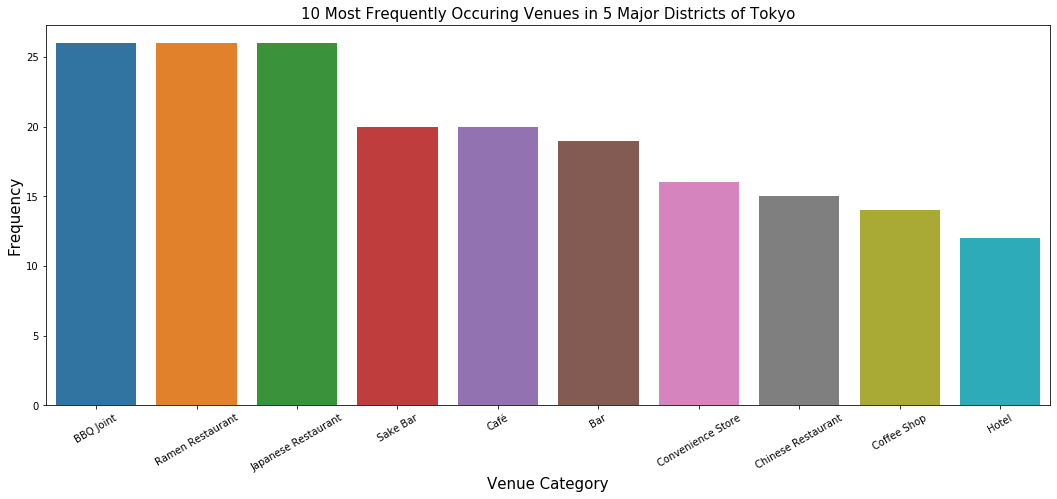

In [107]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

## The most frequently visited veneues in 5 major districts of Tokyo are:

- <font color=red> BBQ Joint
- Ramen Restaurant
- Japanese Resataurant

In [108]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Tokyo_5_Dist_Venues_onehot = pd.get_dummies(Tokyo_5_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Tokyo_5_Dist_Venues_onehot['District'] = Tokyo_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [Tokyo_5_Dist_Venues_onehot.columns[-1]] + list(Tokyo_5_Dist_Venues_onehot.columns[:-1])
Tokyo_5_Dist_Venues_onehot = Tokyo_5_Dist_Venues_onehot[fixed_columns]
###Tokyo_5_Dist_Venues_onehot.head(3)

In [109]:
Tokyo_5_Dist_Venues_Grouped = Tokyo_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Tokyo_5_Dist_Venues_Grouped.index = np.arange(1, len(Tokyo_5_Dist_Venues_Grouped)+1)
Tokyo_5_Dist_Venues_Grouped

,District,Accessories Store,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Bath House,...,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
1,Nagatacho,0.00,0.02,0.00,0.00,0.00,0.08,0.00,0.03,0.00,...,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.02,0.01
2,Nihonbashi,0.00,0.00,0.01,0.01,0.00,0.06,0.04,0.02,0.00,...,0.00,0.00,0.00,0.02,0.01,0.00,0.03,0.00,0.01,0.01
3,Shibuya,0.01,0.00,0.00,0.01,0.01,0.02,0.01,0.02,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00
4,Shinagawa,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.02,0.01,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02
5,Shinjuku,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.10,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01


In [110]:
num_top_venues = 5

for places in Tokyo_5_Dist_Venues_Grouped['District']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Tokyo_5_Dist_Venues_Grouped[Tokyo_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Nagatacho%%%%%%%%
                 Venue  Freq
0  Japanese Restaurant  0.11
1            BBQ Joint  0.08
2          Coffee Shop  0.07
3   Chinese Restaurant  0.05
4     Ramen Restaurant  0.05


%%%%%%%%%Nihonbashi%%%%%%%%
                 Venue  Freq
0  Japanese Restaurant  0.06
1            BBQ Joint  0.06
2                 Café  0.05
3           Hobby Shop  0.04
4               Bakery  0.04


%%%%%%%%%Shibuya%%%%%%%%
              Venue  Freq
0              Café  0.10
1       Record Shop  0.07
2       Coffee Shop  0.05
3  Ramen Restaurant  0.04
4  Sushi Restaurant  0.03


%%%%%%%%%Shinagawa%%%%%%%%
               Venue  Freq
0  Convenience Store  0.16
1   Ramen Restaurant  0.08
2           Sake Bar  0.06
3          BBQ Joint  0.05
4      Grocery Store  0.05


%%%%%%%%%Shinjuku%%%%%%%%
                 Venue  Freq
0             Sake Bar  0.10
1                  Bar  0.10
2     Ramen Restaurant  0.07
3  Japanese Restaurant  0.06
4            BBQ Joint  0.05




#### Create dataframe with top 10 venues for each district

In [111]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]






num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Tokyo_5_Dist_Venues_Grouped['District']

for ind in np.arange(Tokyo_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)
    
    District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nagatacho,Japanese Restaurant,BBQ Joint,Coffee Shop,Hotel,Ramen Restaurant,Chinese Restaurant,Szechuan Restaurant,Bar,Café,Dessert Shop
2,Nihonbashi,Japanese Restaurant,BBQ Joint,Café,Soba Restaurant,Hobby Shop,Bakery,Chinese Restaurant,Italian Restaurant,Department Store,Wagashi Place
3,Shibuya,Café,Record Shop,Coffee Shop,Ramen Restaurant,Seafood Restaurant,Chinese Restaurant,French Restaurant,Sushi Restaurant,Japanese Restaurant,Pub
4,Shinagawa,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Restaurant,Yakitori Restaurant,Park,Soba Restaurant
5,Shinjuku,Sake Bar,Bar,Ramen Restaurant,Japanese Restaurant,BBQ Joint,Pub,Chinese Restaurant,Department Store,Soba Restaurant,Thai Restaurant


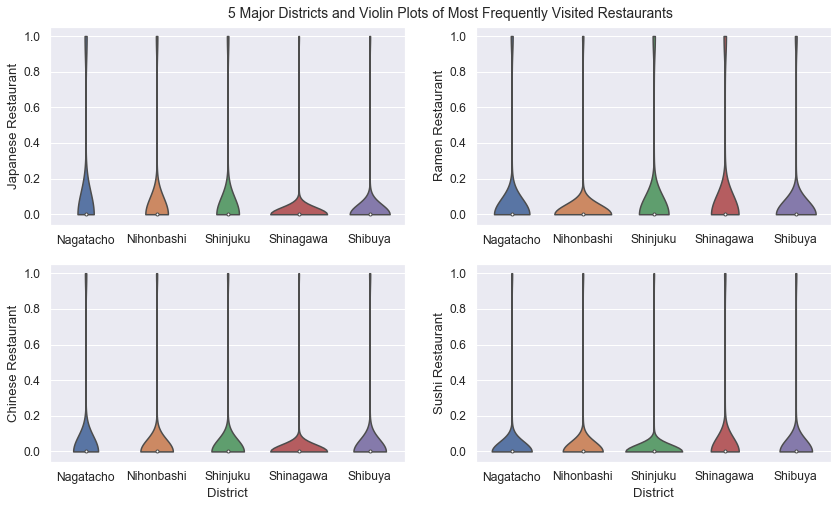

In [112]:
# Let's try Categorical plot 


fig = plt.figure(figsize=(14,8))

sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
sns.violinplot(x="District", y="Japanese Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
ax = plt.subplot(2,2,2)
sns.violinplot(x="District", y="Ramen Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,3)
sns.violinplot(x="District", y="Chinese Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="District", y="Sushi Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 Major Districts and Violin Plots of Most Frequently Visited Restaurants', fontsize=14)
plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()

[56, 41, 27, 33, 30]


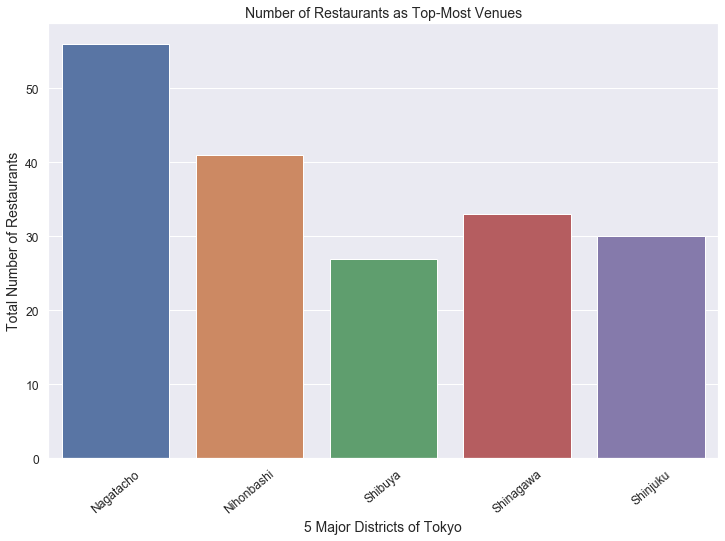

In [113]:
#try groupby to play with restaurant 
Tokyo_5_Dist_Venues_restaurant = Tokyo_5_Dist_Venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Tokyo_5_Dist_Venues_restaurant_df = Tokyo_5_Dist_Venues_restaurant.to_frame().reset_index()
Tokyo_5_Dist_Venues_restaurant_df.columns = ['District', 'Number of Restaurant']
#Tokyo_5_Dist_Venues_restaurant.columns = ['District', 'Number of Restaurant']
#print (type(Tokyo_5_Dist_Venues_restaurant))
Tokyo_5_Dist_Venues_restaurant_df.index = np.arange(1, len(Tokyo_5_Dist_Venues_restaurant_df)+1)

#print ("shape of the dataframe: ", Tokyo_5_Dist_Venues_restaurant_df.shape)
#print (Tokyo_5_Dist_Venues_restaurant_df.head(5))
#print (type(Tokyo_5_Dist_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Tokyo_5_Dist_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=Tokyo_5_Dist_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("5 Major Districts of Tokyo", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

#### Clustering the Tokyo districts (neighborhoods) using K-Means

In [114]:
# set number of clusters
kclusters = 3

Tokyo_grouped_clustering = Tokyo_5_Dist_Venues_Grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [2 2 2 1 0]


In [115]:
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_df_selected_final

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Major_District')

Tokyo_5_Dist_Coordinate_Cluster_merged.head()

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,NaN,2,Japanese Restaurant,BBQ Joint,Coffee Shop,Hotel,Ramen Restaurant,Chinese Restaurant,Szechuan Restaurant,Bar,Café,Dessert Shop
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501,NaN,2,Japanese Restaurant,BBQ Joint,Café,Soba Restaurant,Hobby Shop,Bakery,Chinese Restaurant,Italian Restaurant,Department Store,Wagashi Place
3,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,NaN,0,Sake Bar,Bar,Ramen Restaurant,Japanese Restaurant,BBQ Joint,Pub,Chinese Restaurant,Department Store,Soba Restaurant,Thai Restaurant
4,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,NaN,1,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Restaurant,Yakitori Restaurant,Park,Soba Restaurant
5,Shibuya,15080,227850,Shibuya,35.664596,139.698711,NaN,2,Café,Record Shop,Coffee Shop,Ramen Restaurant,Seafood Restaurant,Chinese Restaurant,French Restaurant,Sushi Restaurant,Japanese Restaurant,Pub


In [116]:
# create map
map_clusters = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_District'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Final map of 3 clusters with radius of the clusters representing number of restaurants in each districts

In [122]:
# create map
map_restaurants10 = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_District'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

## Explore the 3 clusters

#### Cluster 0

In [123]:
Tokyo_Cluster1 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Tokyo_Cluster1.shape[0]))
Tokyo_Cluster1

No of Neighbourhood in Cluster Label 0: 1


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Shinjuku,35.693763,139.703632,NaN,0,Sake Bar,Bar,Ramen Restaurant,Japanese Restaurant,BBQ Joint,Pub,Chinese Restaurant,Department Store,Soba Restaurant,Thai Restaurant


#### Cluster 1

In [124]:
Tokyo_Cluster2 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Tokyo_Cluster2.shape[0]))
Tokyo_Cluster2

No of Neighbourhood in Cluster Label 1: 1


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Shinagawa,35.599252,139.73891,NaN,1,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Restaurant,Yakitori Restaurant,Park,Soba Restaurant


#### Cluster 2

In [125]:
Tokyo_Cluster3 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Tokyo_Cluster3.shape[0]))
Tokyo_Cluster3

No of Neighbourhood in Cluster Label 2: 3


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nagatacho,35.675618,139.743469,NaN,2,Japanese Restaurant,BBQ Joint,Coffee Shop,Hotel,Ramen Restaurant,Chinese Restaurant,Szechuan Restaurant,Bar,Café,Dessert Shop
2,Nihonbashi,35.684058,139.774501,NaN,2,Japanese Restaurant,BBQ Joint,Café,Soba Restaurant,Hobby Shop,Bakery,Chinese Restaurant,Italian Restaurant,Department Store,Wagashi Place
5,Shibuya,35.664596,139.698711,NaN,2,Café,Record Shop,Coffee Shop,Ramen Restaurant,Seafood Restaurant,Chinese Restaurant,French Restaurant,Sushi Restaurant,Japanese Restaurant,Pub
